In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data loading
import pandas as pd

DATASET_PATH = 'StudentPerformanceFactors.csv'
DATASET_TARGET = 'Exam_Score'

df = pd.read_csv(DATASET_PATH)

df

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
6602                    No              High School             

In [3]:
categorical_vars = []
continuous_vars = []
binary_vars = []
ordinal_vars = []
dtype = []

for col in df.columns:
    unique_count = df[col].nunique()
    cols_type = None
    unique = None

    # Categorical variables
    if df[col].dtype == 'object':
        categorical_vars.append(col)
        unique = df[col].unique().tolist()

        # Binary variables
        if unique_count == 2:
            binary_vars.append(col)
            cols_type = 'Binary'

        # Ordinal and nominal variables
        elif unique_count <= 3 and df[col].dtype == 'object':
            ordinal_vars.append(col)
            cols_type = 'Ordinal'
    # Continous variables
    else:
        continuous_vars.append(col)
        cols_type = 'Continuous'

    dtype.append({
        "Name": col,
        "Type": cols_type,
        "Unique value": unique
    })

df_cols_dtype = pd.DataFrame(dtype)

df_cols_dtype

Name        Type  \
0                Hours_Studied  Continuous   
1                   Attendance  Continuous   
2         Parental_Involvement     Ordinal   
3          Access_to_Resources     Ordinal   
4   Extracurricular_Activities      Binary   
5                  Sleep_Hours  Continuous   
6              Previous_Scores  Continuous   
7             Motivation_Level     Ordinal   
8              Internet_Access      Binary   
9            Tutoring_Sessions  Continuous   
10               Family_Income     Ordinal   
11             Teacher_Quality     Ordinal   
12                 School_Type      Binary   
13              Peer_Influence     Ordinal   
14           Physical_Activity  Continuous   
15       Learning_Disabilities      Binary   
16    Parental_Education_Level     Ordinal   
17          Distance_from_Home     Ordinal   
18                      Gender      Binary   
19                  Exam_Score  Continuous   

                                 Unique value  
0                                        None  
1                                        None  
2                         [Low, Medium, High]  
3                         [High, Medium, Low]  
4                                   [No, Yes]  
5                                        None  
6                                        None  
7                         [Low, Medium, High]  
8                                   [Yes, No]  
9                                        None  
10                        [Low, Medium, High]  
11                   [Medium, High, Low, nan]  
12                          [Public, Private]  
13              [Positive, Negative, Neutral]  
14                                       None  
15                                  [No, Yes]  
16  [High School, College, Postgraduate, nan]  
17                 [Near, Moderate, Far, nan]  
18                             [Male, Female]  
19                                       None

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [5]:
df.loc[(df[DATASET_TARGET] > 100, DATASET_TARGET)] = 100

In [6]:
X = df.drop(columns=[DATASET_TARGET])
y = df[DATASET_TARGET]

display(X)
display(y)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  Gender  
0                       No              High School               Near    Male  
1                       No                  College           Moderate  Female  
2                       No             Postgraduate               Near    Male  
3                       No              High School           Moderate    Male  
4                       No                  College               Near  Female  
...                    ...                      ...                ...     ...  
6602           

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6378, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9)

# Create a validation set from training data for early stopping
X_train_fit, X_val, y_train_fit, y_val = train_test_split(X_train, y_train, test_size=2/9, train_size=7/9)

In [8]:
from catboost import CatBoostRegressor, Pool
from skopt import BayesSearchCV
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
bayes_cv = BayesSearchCV(
        CatBoostRegressor(task_type='GPU', 
                          devices='0',
                          silent=False,  # Changed to False to see progress
                          eval_metric='RMSE'),
        {
            'depth': (2, 10), 
            'iterations': (1000, 5000),
            'learning_rate': (1e-3, 3e-3),  
            'l2_leaf_reg': (1, 10)
        },
        n_iter=10, cv=3, scoring='r2'
)

print("Starting hyperparameter optimization with cross-validation...")
bayes_cv.fit(X_train, y_train, 
             cat_features=categorical_vars) 

Starting hyperparameter optimization with cross-validation...
0:	learn: 3.8204140	total: 97.6ms	remaining: 2m 51s
1:	learn: 3.8172528	total: 129ms	remaining: 1m 53s
2:	learn: 3.8141801	total: 152ms	remaining: 1m 29s
3:	learn: 3.8111219	total: 180ms	remaining: 1m 19s
4:	learn: 3.8080130	total: 209ms	remaining: 1m 13s
5:	learn: 3.8049221	total: 234ms	remaining: 1m 8s
6:	learn: 3.8018488	total: 258ms	remaining: 1m 4s
7:	learn: 3.7988205	total: 286ms	remaining: 1m 2s
8:	learn: 3.7957270	total: 312ms	remaining: 1m
9:	learn: 3.7926322	total: 343ms	remaining: 1m
10:	learn: 3.7896352	total: 373ms	remaining: 59.3s
11:	learn: 3.7866391	total: 402ms	remaining: 58.6s
12:	learn: 3.7835697	total: 431ms	remaining: 58s
13:	learn: 3.7805360	total: 462ms	remaining: 57.7s
14:	learn: 3.7775625	total: 491ms	remaining: 57.1s
15:	learn: 3.7745853	total: 523ms	remaining: 57.1s
16:	learn: 3.7715696	total: 551ms	remaining: 56.6s
17:	learn: 3.7686436	total: 577ms	remaining: 55.9s
18:	learn: 3.7657082	total: 604m

BayesSearchCV(cv=3,
              estimator=<catboost.core.CatBoostRegressor object at 0x00000128C696A7B0>,
              n_iter=10, scoring='r2',
              search_spaces={'depth': (2, 10), 'iterations': (1000, 5000),
                             'l2_leaf_reg': (1, 10),
                             'learning_rate': (0.001, 0.003)})

In [9]:
# Train a model with best parameters to get training history for plotting R2 scores
from sklearn.metrics import r2_score

# Get best parameters from BayesSearchCV
best_params = bayes_cv.best_params_

print("Training final model with best hyperparameters from cross-validation...")
print(f"Best parameters: {best_params}\n")

# Create a model with best parameters using R2 as evaluation metric
model_r2 = CatBoostRegressor(
    task_type='GPU',
    devices='0',
    silent=False,
    eval_metric='R2',  # Use R2 as evaluation metric
    metric_period=1,  # Record metrics at every iteration to see all iterations
    use_best_model=True,
    early_stopping_rounds=50,  # Early stopping to prevent overfitting
    **best_params
)

# Train with eval_set to track R2 scores at each iteration (using explicit validation split)
model_r2.fit(
    X_train_fit, y_train_fit,
    eval_set=[(X_val, y_val)],
    cat_features=categorical_vars,
    plot=False
)

Training final model with best hyperparameters from cross-validation...
Best parameters: OrderedDict({'depth': 4, 'iterations': 3408, 'l2_leaf_reg': 7, 'learning_rate': 0.0026873422380384376})



Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 0.0023852	test: 0.0023924	best: 0.0023924 (0)	total: 42.3ms	remaining: 2m 24s
1:	learn: 0.0047953	test: 0.0048701	best: 0.0048701 (1)	total: 82.2ms	remaining: 2m 19s
2:	learn: 0.0070596	test: 0.0071438	best: 0.0071438 (2)	total: 125ms	remaining: 2m 22s
3:	learn: 0.0094294	test: 0.0095435	best: 0.0095435 (3)	total: 178ms	remaining: 2m 31s
4:	learn: 0.0117480	test: 0.0118943	best: 0.0118943 (4)	total: 230ms	remaining: 2m 36s
5:	learn: 0.0140926	test: 0.0142684	best: 0.0142684 (5)	total: 281ms	remaining: 2m 39s
6:	learn: 0.0163501	test: 0.0166207	best: 0.0166207 (6)	total: 330ms	remaining: 2m 40s
7:	learn: 0.0186712	test: 0.0189707	best: 0.0189707 (7)	total: 370ms	remaining: 2m 37s
8:	learn: 0.0209352	test: 0.0212945	best: 0.0212945 (8)	total: 410ms	remaining: 2m 34s
9:	learn: 0.0230821	test: 0.0234578	best: 0.0234578 (9)	total: 447ms	remaining: 2m 31s
10:	learn: 0.0253934	test: 0.0258000	best: 0.0258000 (10)	total: 497ms	remaining: 2m 33s
11:	learn: 0.0276512	test: 0.0280968	be

Debug info:
  Train R2 length: 3408
  Val R2 length: 3408
  Model best_iteration_: 3407
  Model tree_count_: 3408


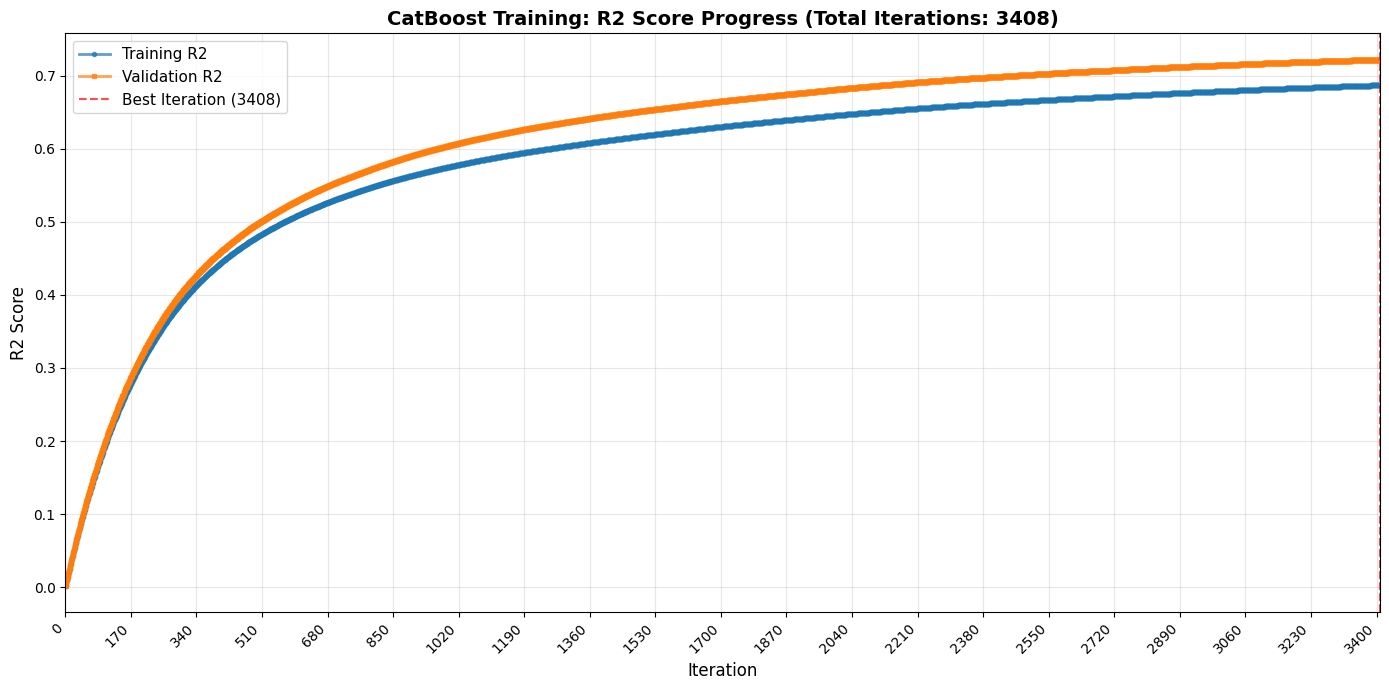


Best Iteration: 3408
Total Iterations Trained: 3408
Best Validation R2: 0.7218
Final Training R2: 0.6869
Final Validation R2: 0.7218

Model best iteration: 3408 (early stopping prevented overfitting)


In [10]:
# Get R2 scores from evaluation results
evals_result_r2 = model_r2.get_evals_result()

# Extract R2 scores - convert to lists to ensure we can work with all data
train_r2 = list(evals_result_r2['learn']['R2'])
# Depending on CatBoost version, the validation key can be 'validation' or 'validation_0'
val_key = 'validation' if 'validation' in evals_result_r2 else 'validation_0'
val_r2 = list(evals_result_r2[val_key]['R2'])

# Get the actual best iteration from the model (0-indexed, so add 1 for display)
# Also get the total number of iterations the model actually ran
best_iteration = model_r2.best_iteration_ + 1 if hasattr(model_r2, 'best_iteration_') and model_r2.best_iteration_ is not None else len(val_r2)
total_iterations_trained = model_r2.tree_count_ if hasattr(model_r2, 'tree_count_') else max(len(train_r2), len(val_r2))

print(f"Debug info:")
print(f"  Train R2 length: {len(train_r2)}")
print(f"  Val R2 length: {len(val_r2)}")
print(f"  Model best_iteration_: {model_r2.best_iteration_ if hasattr(model_r2, 'best_iteration_') else 'N/A'}")
print(f"  Model tree_count_: {model_r2.tree_count_ if hasattr(model_r2, 'tree_count_') else 'N/A'}")

# Use all available iterations - use the maximum length to show all data
max_len = max(len(train_r2), len(val_r2))

# Ensure both lists have the same length for plotting
if len(train_r2) < max_len:
    train_r2.extend([train_r2[-1]] * (max_len - len(train_r2)))  # Extend with last value
if len(val_r2) < max_len:
    val_r2.extend([val_r2[-1]] * (max_len - len(val_r2)))  # Extend with last value

# Use all iterations for plotting
train_r2_plot = train_r2[:max_len]
val_r2_plot = val_r2[:max_len]
iterations_plot = list(range(1, max_len + 1))

# Plot R2 scores - showing ALL training iterations
plt.figure(figsize=(14, 7))
plt.plot(iterations_plot, train_r2_plot, label='Training R2', marker='o', linewidth=2, markersize=3, alpha=0.7)
plt.plot(iterations_plot, val_r2_plot, label='Validation R2', marker='s', linewidth=2, markersize=3, alpha=0.7)
plt.axvline(x=best_iteration, color='red', linestyle='--', linewidth=1.5, 
            label=f'Best Iteration ({best_iteration})', alpha=0.7)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.title(f'CatBoost Training: R2 Score Progress (Total Iterations: {len(iterations_plot)})', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Set x-axis to show all iterations clearly
plt.xlim(0, max(iterations_plot) + 1)
# Adjust x-axis ticks to show reasonable number of labels
max_ticks = 20
if len(iterations_plot) > max_ticks:
    step = max(1, len(iterations_plot) // max_ticks)
    plt.xticks(range(0, max(iterations_plot) + 1, step), rotation=45, ha='right')
else:
    plt.xticks(range(1, max(iterations_plot) + 1))

plt.tight_layout()
plt.show()

print(f"\nBest Iteration: {best_iteration}")
print(f"Total Iterations Trained: {len(iterations_plot)}")
print(f"Best Validation R2: {max(val_r2_plot):.4f}")
print(f"Final Training R2: {train_r2_plot[-1]:.4f}")
print(f"Final Validation R2: {val_r2_plot[-1]:.4f}")
print(f"\nModel best iteration: {best_iteration} (early stopping prevented overfitting)")


In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return r2_square, mae, rmse, 

Evaluating shrunk model on test set...
R2: 0.7336 | MAE: 0.7981 | RMSE: 1.8515
Model trees after shrink: 3408


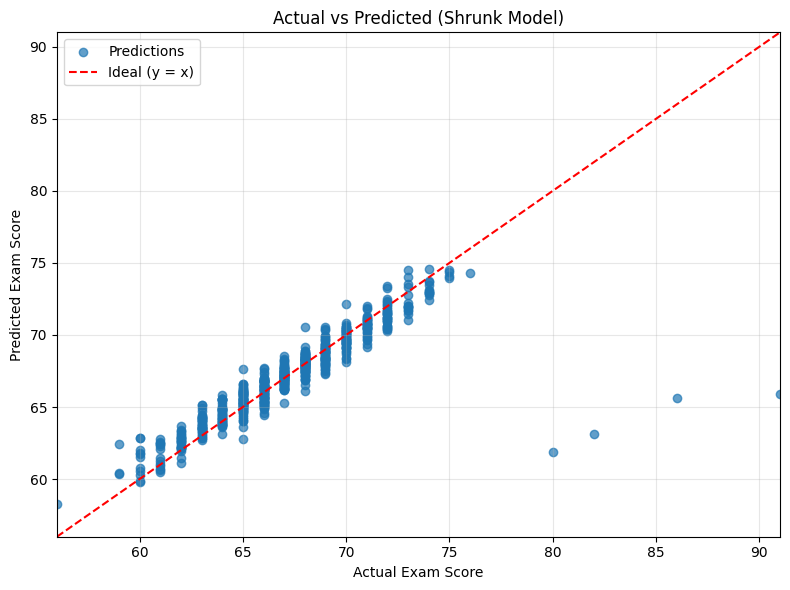

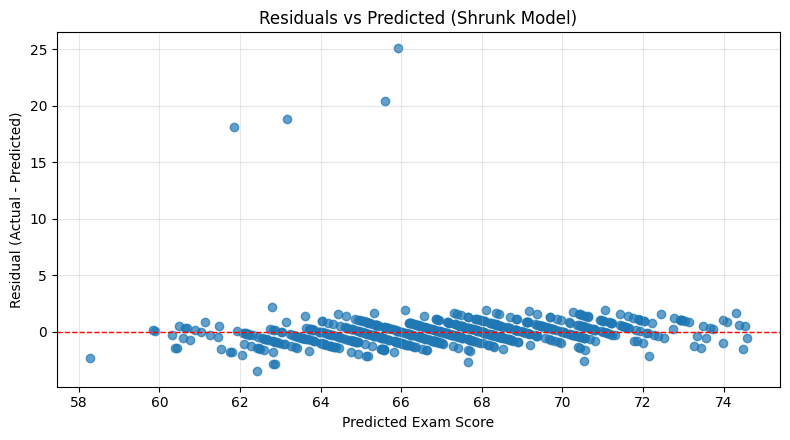

In [12]:
# Evaluate the shrunk model on the test set and plot predictions vs actual
print("Evaluating shrunk model on test set...")

y_pred_test = model_r2.predict(X_test)

r2_eval, mae_eval, rmse_eval = evaluate_model(y_test, y_pred_test)
print(f"R2: {r2_eval:.4f} | MAE: {mae_eval:.4f} | RMSE: {rmse_eval:.4f}")
print(f"Model trees after shrink: {model_r2.tree_count_}")

# Convert to numpy arrays for plotting safety
y_test_arr = np.asarray(y_test)
y_pred_arr = np.asarray(y_pred_test)

# Actual vs predicted scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_arr, y_pred_arr, alpha=0.7, label='Predictions')
lims = [min(y_test_arr.min(), y_pred_arr.min()), max(y_test_arr.max(), y_pred_arr.max())]
plt.plot(lims, lims, 'r--', label='Ideal (y = x)')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted (Shrunk Model)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(lims)
plt.ylim(lims)
plt.tight_layout()
plt.show()

# Residuals plot
residuals = y_test_arr - y_pred_arr
plt.figure(figsize=(8, 4.5))
plt.scatter(y_pred_arr, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals vs Predicted (Shrunk Model)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()